In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.feature_selection import SelectKBest,chi2,RFECV
import seaborn as sns
import time

import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/precision'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/precision/data.csv
/content/drive/My Drive/precision/correcte.ipynb
/content/drive/My Drive/precision/comparaison.ipynb
/content/drive/My Drive/precision/dataBratsplustumeur.csv
/content/drive/My Drive/precision/supprime.csv
/content/drive/My Drive/precision/data_RFE.csv
/content/drive/My Drive/precision/data_suppskewness.csv
/content/drive/My Drive/precision/data_BM.csv
/content/drive/My Drive/precision/submission.csv
/content/drive/My Drive/precision/sample_submission.csv
/content/drive/My Drive/precision/Brats2020/BraTS20_Training_208/BraTS20_Training_208_flair.nii
/content/drive/My Drive/precision/Brats2020/BraTS20_Training_208/BraTS20_Training_208_t1.nii
/content/drive/My Drive/precision/Brats2020/BraTS20_Training_208/BraTS20_Training_208_seg.nii
/content/drive/My Drive/precision/Brats2020/BraTS20_Training_208/BraTS20_Training_208_t1ce.nii
/content/drive/My Drive/precision/Brats2020/BraTS20_Training_208/BraTS20_Training_208_t2.nii
/content/drive/My Drive/pr

In [3]:
data=pd.read_csv("/content/drive/My Drive/precision/data_RFE.csv")
data.head()

,id,10Percentile,90Percentile,Energy,Entropy,InterquartileRange,Kurtosis,Maximum,MeanAbsoluteDeviation,Mean,Median,Minimum,Range,RobustMeanAbsoluteDeviation,RootMeanSquared,Skewness,TotalEnergy,Uniformity,Variance,diagnosis
0,Brats17_TCIA_331,536.0,750.0,3.111775e+08,3.866283,112.25,4.032018,953.0,71.065048,643.437500,641.0,394.0,559.0,46.512441,650.227258,0.548493,3.111775e+08,0.083563,8783.670007,1
1,Brats17_TCIA_332,330.4,508.0,1.129536e+09,3.411143,71.00,3.786013,632.0,51.616230,428.782289,435.0,199.0,433.0,31.299912,434.428148,-0.585346,1.129536e+09,0.120538,4873.564465,1
2,Brats17_TCIA_335,182.0,396.0,1.202952e+09,3.373271,164.00,1.543203,471.0,76.041515,297.042053,318.0,117.0,354.0,65.206090,308.655554,-0.233349,1.202952e+09,0.108310,7034.270109,1
3,Brats17_TCIA_338,231.0,338.0,2.553628e+08,2.881545,55.00,3.763767,449.0,34.442067,285.089693,283.0,133.0,316.0,22.898203,288.597641,0.066007,2.553628e+08,0.166115,2012.465210,0
4,Brats17_TCIA_343,132.0,195.0,3.127860e+07,2.079769,34.00,2.880471,215.0,19.932968,161.889460,162.0,63.0,152.0,14.588893,163.714920,-0.127583,3.127860e+07,0.265740,594.377670,0


In [4]:
data = data.drop(['id' ],axis = 1)
data.head()

,10Percentile,90Percentile,Energy,Entropy,InterquartileRange,Kurtosis,Maximum,MeanAbsoluteDeviation,Mean,Median,Minimum,Range,RobustMeanAbsoluteDeviation,RootMeanSquared,Skewness,TotalEnergy,Uniformity,Variance,diagnosis
0,536.0,750.0,3.111775e+08,3.866283,112.25,4.032018,953.0,71.065048,643.437500,641.0,394.0,559.0,46.512441,650.227258,0.548493,3.111775e+08,0.083563,8783.670007,1
1,330.4,508.0,1.129536e+09,3.411143,71.00,3.786013,632.0,51.616230,428.782289,435.0,199.0,433.0,31.299912,434.428148,-0.585346,1.129536e+09,0.120538,4873.564465,1
2,182.0,396.0,1.202952e+09,3.373271,164.00,1.543203,471.0,76.041515,297.042053,318.0,117.0,354.0,65.206090,308.655554,-0.233349,1.202952e+09,0.108310,7034.270109,1
3,231.0,338.0,2.553628e+08,2.881545,55.00,3.763767,449.0,34.442067,285.089693,283.0,133.0,316.0,22.898203,288.597641,0.066007,2.553628e+08,0.166115,2012.465210,0
4,132.0,195.0,3.127860e+07,2.079769,34.00,2.880471,215.0,19.932968,161.889460,162.0,63.0,152.0,14.588893,163.714920,-0.127583,3.127860e+07,0.265740,594.377670,0


In [5]:
data.diagnosis.value_counts(normalize = True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])
data.diagnosis.value_counts(normalize=True)

1    0.719665
0    0.280335
Name: diagnosis, dtype: float64

In [6]:
# Standardizing our features except target variable
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
stand_scale = data.drop(['diagnosis'],axis = 1)
col_trans = make_column_transformer(
            (StandardScaler(), stand_scale.columns),
            remainder = 'passthrough')

In [7]:
from sklearn.model_selection import train_test_split
X = data.drop(['diagnosis'], axis = 1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [8]:
!pip install catboost

     |████████████████████████████████| 65.8MB 58kB/s 


In [9]:
#from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Lasso
from lightgbm import LGBMRegressor
from catboost import Pool, CatBoostRegressor
from sklearn.model_selection import cross_val_score

In [18]:
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import LabelEncoder
import gc

def RMSLE(y_true, y_pred, *args, **kwargs):
   return np.sqrt(mean_squared_log_error(y_true, y_pred))

autre kaggle

In [19]:
from sklearn.model_selection import KFold


In [20]:
svr_params = {
    "kernel": "poly",
    "C": 0.053677105521141605,
    "epsilon": 0.03925943476562099,
    "coef0": 0.9486751042886584,
}
ridge_params = {
    "alpha": 0.9999189637151178,
    "tol": 0.8668539399622242,
    "solver": "cholesky",
}
lasso_params = {"alpha":1.0, "max_iter":1, "tol":0.01,}
lgbm_params = {
    "num_leaves": 16,
    "max_depth": 4,
    "learning_rate": 0.16060612646519587,
    "n_estimators": 94,
    "min_child_weight": 0.4453842422224686,
}

gbr_params = { "n_estimators":17, "alpha":0.9,  "tol":0.1,}
rdf_params = {"n_estimators":6, "max_depth":4}
lnr_params ={ "fit_intercept":True, "normalize":False, "copy_X":True,}
knb_params = {"n_neighbors":2, }
tree_params = {"criterion":'mse',  "max_depth":7}
enet_params = { "alpha":1.0,  "fit_intercept":True, "max_iter":0,}
hub_params = {"epsilon":1.36, "max_iter":100, "alpha":0.1,  "tol":0.01, }
cat_params = {"iterations":7,"learning_rate":0.9}
    

In [23]:
from mlxtend.regressor import StackingCVRegressor


svr = SVR(**svr_params)
ridge = Ridge(**ridge_params, random_state=0)
lasso = Lasso(**lasso_params, random_state=0)
lgbm = LGBMRegressor(**lgbm_params, random_state=0)
gbr= GradientBoostingRegressor(**gbr_params, random_state=0)
rdf = RandomForestRegressor(**rdf_params,random_state=0)
lnr= LinearRegression(**lnr_params)
knb= KNeighborsRegressor(**knb_params)
tree=DecisionTreeRegressor(**tree_params, random_state=0)
enet= ElasticNet(**enet_params, random_state=0)
hub = HuberRegressor(**hub_params)
cat=CatBoostRegressor(**cat_params, random_state=0)


svr_scores = svr.fit( X_train, y_train)
ridge_scores = ridge.fit( X_train, y_train)
lasso_scores = lasso.fit(X_train, y_train)
lgbm_scores = lgbm.fit(X_train, y_train)
gbr_scores = gbr.fit(X_train, y_train)
rdf_scores = rdf.fit(X_train, y_train)
lnr_scores = lnr.fit(X_train, y_train)
knb_scores = knb.fit(X_train, y_train)
tree_scores = tree.fit(X_train, y_train)
enet_scores = enet.fit(X_train, y_train)
hub_scores = hub.fit(X_train, y_train)
cat_scores = cat.fit(X_train, y_train)

y_pred=svr_scores.predict(X_test) 
y_pred = np.exp(y_pred)
svr_result=round((RMSLE(y_test, y_pred)*100),2)

y_pred1=ridge_scores.predict(X_test) 
y_pred1 = np.exp(y_pred1)
ridge_result=round((RMSLE(y_test, y_pred1)*100),2)

y_pred2=lasso_scores.predict(X_test) 
y_pred2 = np.exp(y_pred2)
lasso_result=round((RMSLE(y_test, y_pred2)*100),2)

y_pred3=lgbm_scores.predict(X_test) 
y_pred3 = np.exp(y_pred3)
lgbm_result=round((RMSLE(y_test, y_pred3)*100),2)

y_pred4=gbr_scores.predict(X_test) 
y_pred4 = np.exp(y_pred4)
gbr_result=round((RMSLE(y_test, y_pred4)*100),2)

y_pred5=rdf_scores.predict(X_test) 
y_pred5 = np.exp(y_pred5)
rdf_result=round((RMSLE(y_test, y_pred5)*100),2)

y_pred6=lnr_scores.predict(X_test) 
y_pred6 = np.exp(y_pred6)
lnr_result=round((RMSLE(y_test, y_pred6)*100),2)

y_pred8=knb_scores.predict(X_test) 
y_pred8 = np.exp(y_pred8)
knb_result=round((RMSLE(y_test, y_pred8)*100),2)

y_pred9 = tree_scores.predict(X_test) 
y_pred9 = np.exp(y_pred9)
tree_result=round((RMSLE(y_test, y_pred9)*100),2)

y_pred10=enet_scores.predict(X_test) 
y_pred10 = np.exp(y_pred10)
enet_result=round((RMSLE(y_test, y_pred10)*100),2)

y_pred11=hub_scores.predict(X_test) 
y_pred11 = np.exp(y_pred11)
hub_result=round((RMSLE(y_test, y_pred11)*100),2)     #round(hub_result,3)) permet d'afficher le nombre 2 chiffre aprés la virgule

y_pred12=cat_scores.predict(X_test) 
y_pred12 = np.exp(y_pred12)
cat_result=round((RMSLE(y_test, y_pred12)*100),2)



models = ["SVR", "Ridge", "Lasso", "LGBM", "GradientBoosting", "Randomforest", "Linear",  "KNeighbors", "Tree", "ElasticNet", "Huber", "CatBoost"]
scores = [svr_result,ridge_result,lasso_result,lgbm_result,gbr_result,rdf_result, lnr_result, knb_result, tree_result, enet_result, hub_result, cat_result]
print(models)
print(scores)


0:	learn: 0.4189229	total: 4.41ms	remaining: 26.4ms
1:	learn: 0.3974779	total: 8.16ms	remaining: 20.4ms
2:	learn: 0.3511745	total: 11.5ms	remaining: 15.3ms
3:	learn: 0.3348315	total: 14.8ms	remaining: 11.1ms
4:	learn: 0.3162654	total: 18ms	remaining: 7.2ms
5:	learn: 0.2947650	total: 21.5ms	remaining: 3.58ms
6:	learn: 0.2808703	total: 24.8ms	remaining: 0us
['SVR', 'Ridge', 'Lasso', 'LGBM', 'GradientBoosting', 'Randomforest', 'Linear', 'KNeighbors', 'Tree', 'ElasticNet', 'Huber', 'CatBoost']
[77.07, 58.15, 59.6, 61.14, 61.54, 62.7, 58.23, 64.21, 68.53, 60.18, 50.85, 65.32]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.448834235817714, tolerance: 0.4038743455497384
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 0.004038743455497384
  positive)


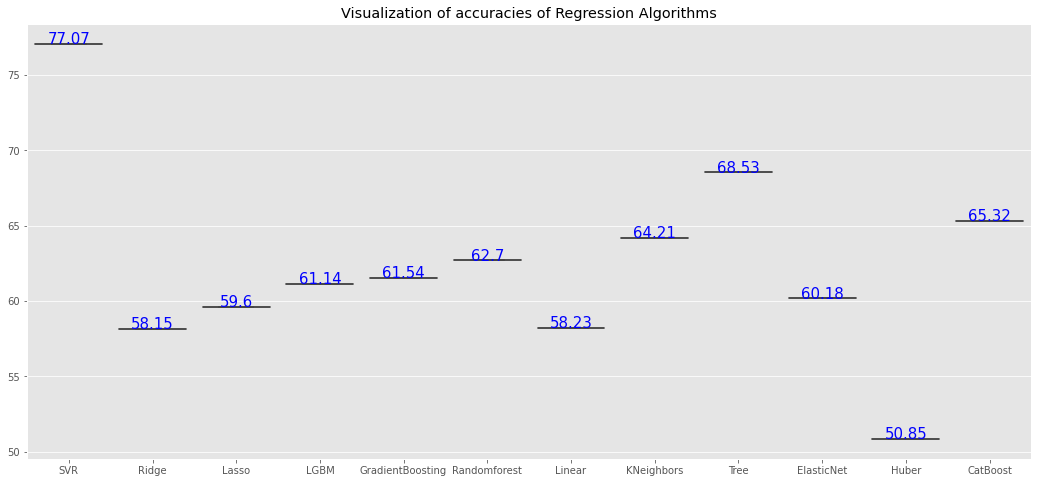

In [29]:
fig, ax = plt.subplots(figsize=(18, 8))   #taille de la fenetre longeur largeur
ax.set_title('Visualization of accuracies of Regression Algorithms')
bp = sns.boxplot(x=models, y=scores, ax=ax)

for xtick in bp.get_xticks():
    bp.text(
        xtick,
        scores[xtick],
        scores[xtick],    #permet d'affichier en bleu la donnée sur le point resultat
        horizontalalignment="center",
        size=15,     #taille des chiffres
        color="b",
        weight="book",   #style d'ecriture
    )

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


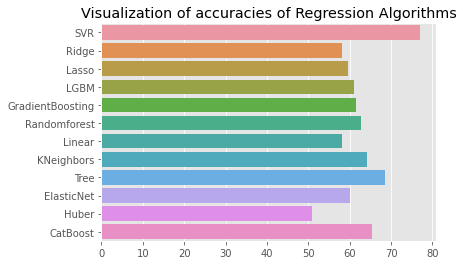

In [30]:
sns.set_colorcodes=True
plt.title('Visualization of accuracies of Regression Algorithms')
sns.barplot(scores,models)